<a href="https://colab.research.google.com/github/kyulee-jeon/machine-learning/blob/master/Paper_Search(COVID_19)_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Crawling from PubMed
- PubMed
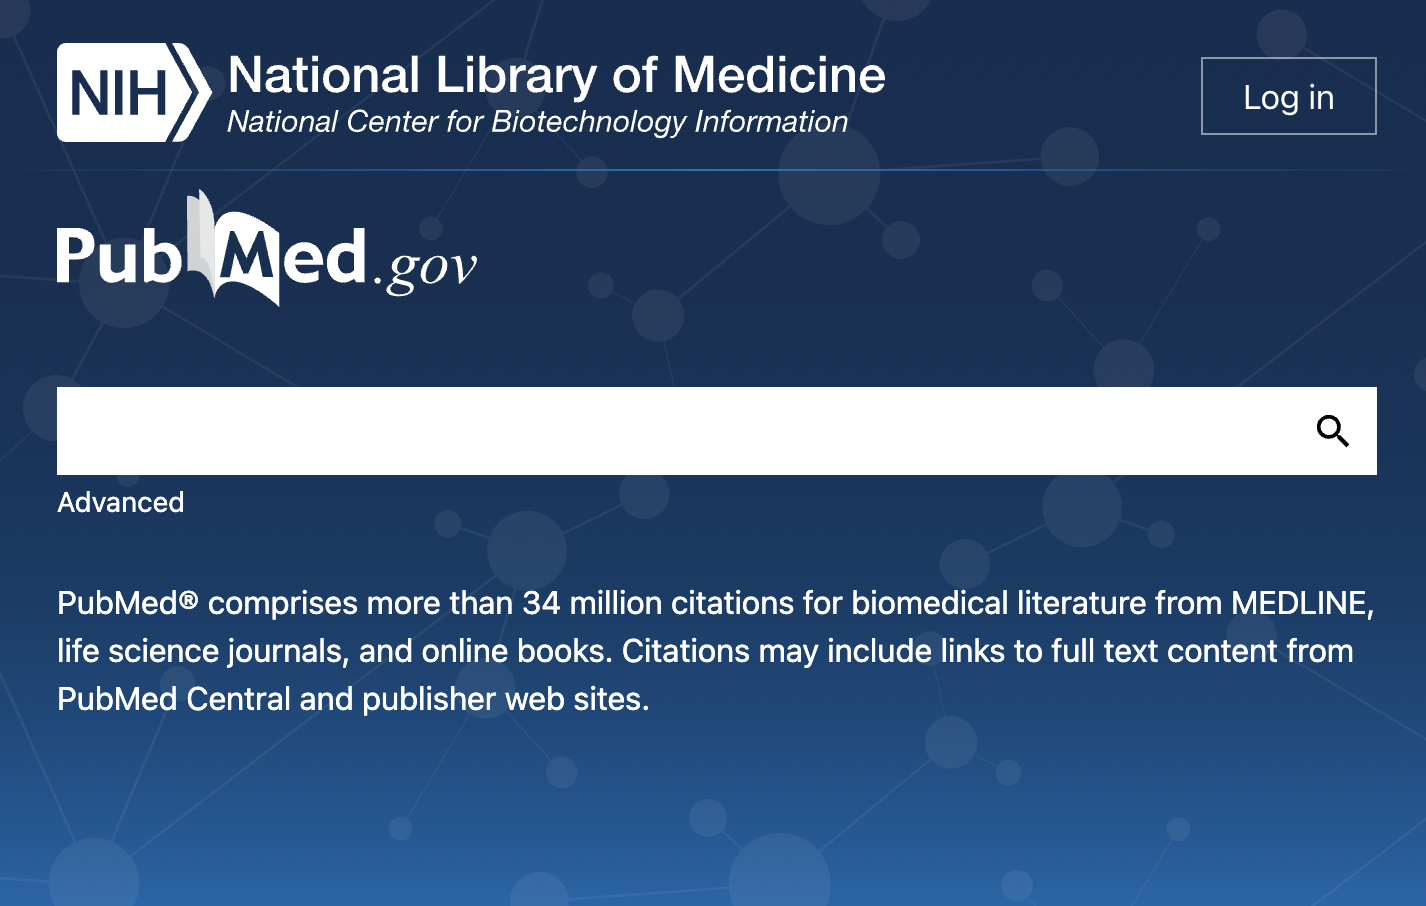

- BeautifulSoup : https://beautiful-soup-4.readthedocs.io/en/latest/

## 1. 모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

## 2. 논문 한 편 크롤링 해보기
- https://pubmed.ncbi.nlm.nih.gov/33400058/

In [ ]:
webpage = requests.get('https://pubmed.ncbi.nlm.nih.gov/33400058/')
soup = BeautifulSoup(webpage.content, "html.parser")
soup

def no_space(text):
  text1 = re.sub('\n','', text) # 줄바꿈 해제
  text2 = re.sub('  ','', text1) # Tab 해제
  return text2

In [ ]:
title = soup.h1.string
title = no_space(title)
title

'Recent Developments on Therapeutic and Diagnostic Approaches for COVID-19'

In [ ]:
doi = soup.select(".id-link")[1].string
doi = no_space(doi)
doi

'10.1208/s12248-020-00532-2'

In [ ]:
abstract = soup.find_all(attrs={'class':'abstract-content selected'})[0].get_text()
abstract = no_space(abstract)
abstract

'The ongoing pandemic of coronavirus disease 2019 (COVID-19) caused by the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) has made a serious public health threat worldwide with millions of people at risk in a growing number of countries. Though there are no clinically approved antiviral drugs and vaccines for COVID-19, attempts are ongoing for clinical trials of several known antiviral drugs, their combination, as well as development of vaccines in patients with confirmed COVID-19. This review focuses on the latest approaches to diagnostics and therapy of COVID-19. We have summarized recent progress on the conventional therapeutics such as antiviral drugs, vaccines, anti-SARS-CoV-2 antibody treatments, and convalescent plasma therapy which are currently under extensive research and clinical trials for the treatment of COVID-19. The developments of nanoparticle-based therapeutic and diagnostic approaches have been also discussed for COVID-19. We have assessed recent litera

## 3. 논문 여러 편 크롤링 해보기
- PubMed Search: 'Covid-19'

In [ ]:
# https://pubmed.ncbi.nlm.nih.gov/?term=covid-19
webpage = requests.get('https://pubmed.ncbi.nlm.nih.gov/?term=covid-19')
soup = BeautifulSoup(webpage.content, "html.parser")
pmid = soup.find_all(attrs={'class':'docsum-pmid'})

In [ ]:
pmids = []
for x in range(len(pmid)):
    id = soup.find_all(attrs={'class':'docsum-pmid'})[x].get_text()
    pmids.append(id)

print(pmids)

['33400058', '33139420', '33980687', '33394144', '33322035', '32761898', '32659413', '32383182', '33666147', '33126180']


In [ ]:
def pubmed_crawl(pmid):
  pubmed = "https://pubmed.ncbi.nlm.nih.gov/"
  titles = []
  dois = []
  abs = []
  for i, id in enumerate(pmid):
    webpage = requests.get(pubmed + id)
    soup = BeautifulSoup(webpage.content, "html.parser")

    title = soup.h1.string
    title = no_space(title)

    doi = soup.select(".id-link")[1].string
    doi = no_space(doi)

    ab_crawl = soup.find_all(attrs={'class':'abstract-content selected'})
    if len(ab_crawl) > 0 :
      abstract = soup.find_all(attrs={'class':'abstract-content selected'})[0].get_text()
      abstract = no_space(abstract)
    else:
      abstract = ''

    titles.append(title)
    dois.append(doi)
    abs.append(abstract)

  df = pd.DataFrame({'title': titles, 'doi': dois, 'ab': abs})
  return df


In [ ]:
pub_df = pubmed_crawl(pmids)
pub_df

,title,doi,ab
0,Recent Developments on Therapeutic and Diagnos...,10.1208/s12248-020-00532-2,The ongoing pandemic of coronavirus disease 20...
1,Evaluation of the Panbio COVID-19 Rapid Antige...,10.1128/JCM.02589-20,
2,Tools and Techniques for Severe Acute Respirat...,10.1128/CMR.00228-20,The coronavirus disease 2019 (COVID-19) pandem...
3,Detection technologies and recent developments...,10.1007/s00253-020-11061-5,COVID-19 is a disease caused by SARS-CoV-2 cap...
4,Comparison of Rapid Antigen Tests for COVID-19,10.3390/v12121420,Reverse transcription-quantitative PCR (RT-qPC...
5,A systematic review and meta-analysis of child...,10.1002/jmv.26398,To provide a comprehensive and systematic anal...
6,Systematic review with meta-analysis of the ac...,10.1016/j.ajic.2020.07.011,Objective:To collate the evidence on the accur...
7,Should RT-PCR be considered a gold standard in...,10.1002/jmv.25996,
8,Lessons learned 1 year after SARS-CoV-2 emerge...,10.1080/22221751.2021.1898291,Without modern medical management and vaccines...
9,COVID-19 diagnosis -A review of current methods,10.1016/j.bios.2020.112752,A fast and accurate self-testing tool for COVI...


In [ ]:
# save
pub_df.to_csv('/content/drive/MyDrive/pubmed_covid.csv')

#Paper Search using Scopus API
- SCOPUS
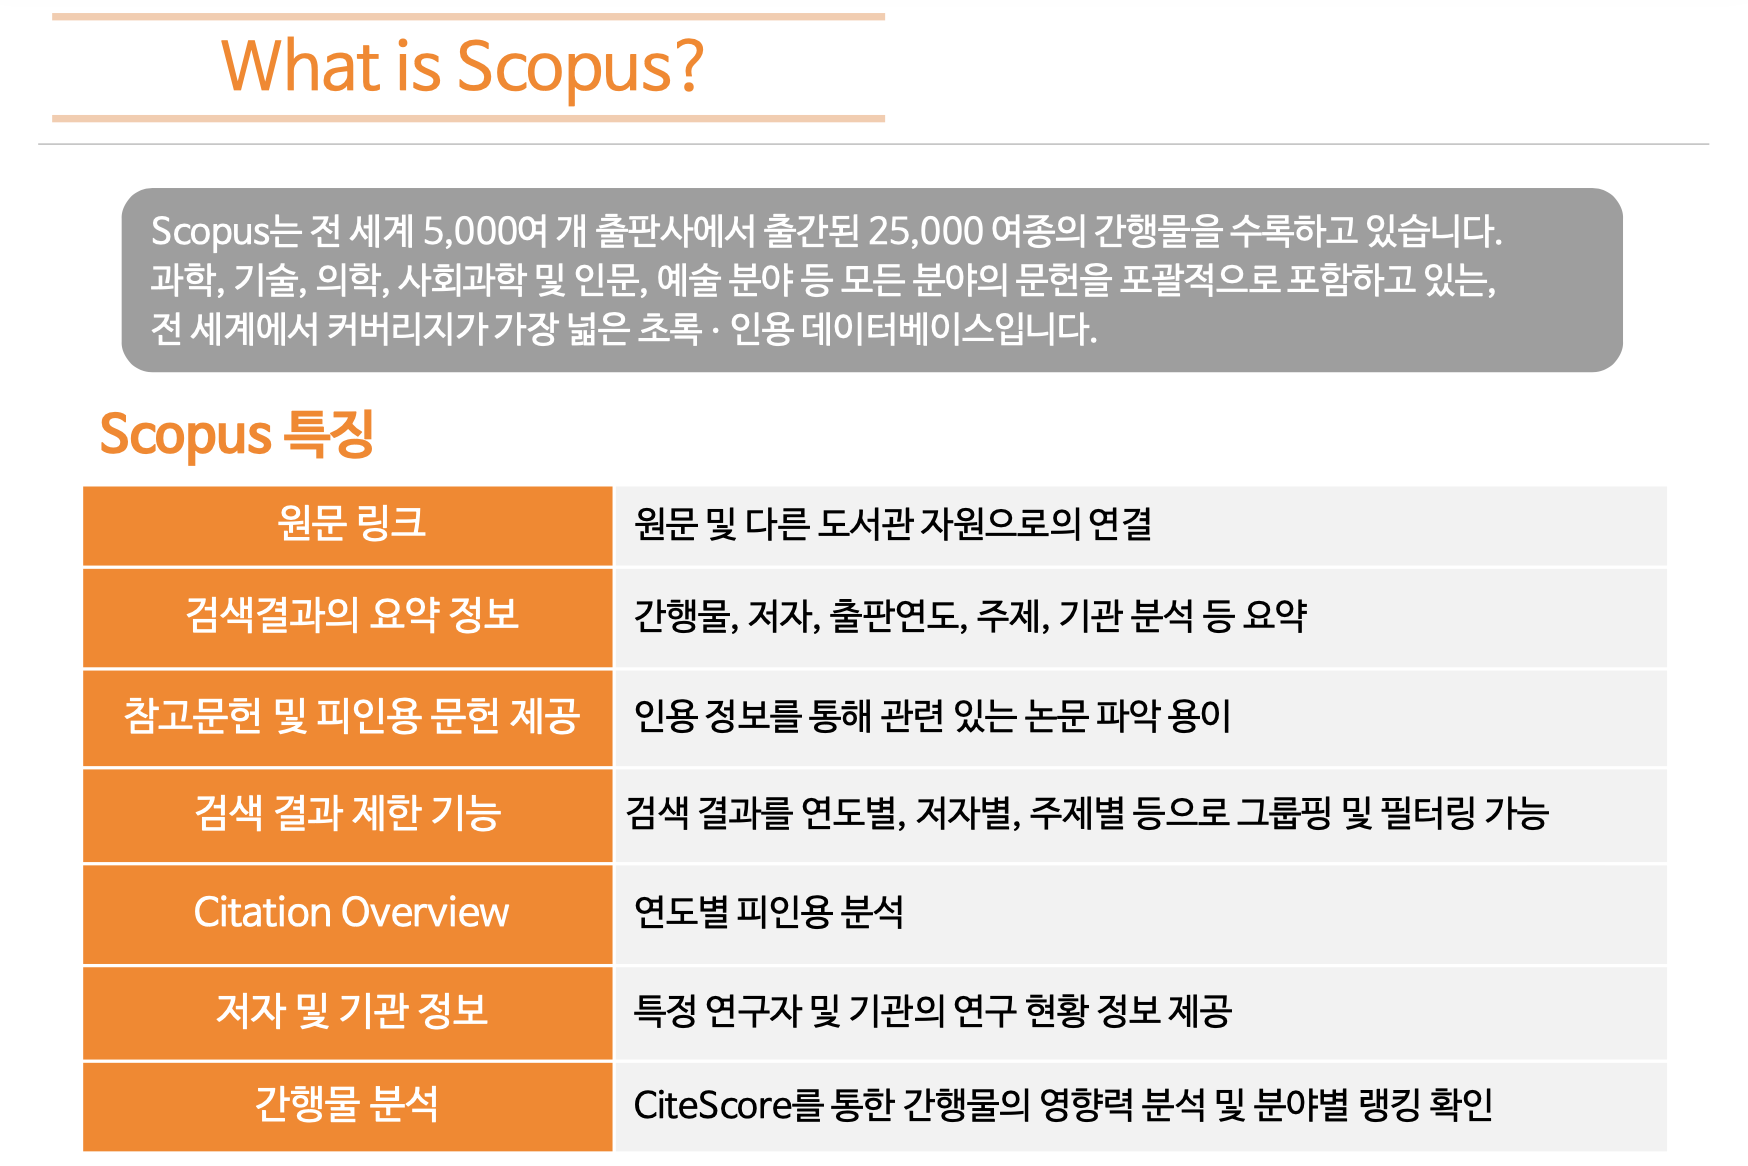

- Scopus API: elsevier사가 제공하는 API를 사용해서 파이썬으로 데이터를 받고 정리할 수 있음
- pybliometrics: https://pypi.org/project/pybliometrics/

##  1. Register API Keys
- https://pybliometrics.readthedocs.io/en/stable/access.html

In [ ]:
!pip install pybliometrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 920 kB 4.9 MB/s 
  Using cached pbr-5.11.0-py2.py3-none-any.whl (112 kB)
     |████████████████████████████████| 130 kB 66.3 MB/s 
  Created wheel for pybliometrics: filename=pybliometrics-3.4.0-py2.py3-none-any.whl size=73925 sha256=d4d0d6f1309bc5dcb7d4c1cb97d8337b425085abe0b6a7726861961680fa4008
  Stored in directory: /root/.cache/pip/wheels/b2/99/1d/94a76078ed9f01e122c8961546a1ac5dceb7b7d8b475e6e197
Successfully built pybliometrics


In [ ]:
# API Keys : Sign in - Register - Copy and Paste
# InstToken : 생략 (Enter)
import pybliometrics

Creating config file at /root/.pybliometrics/config.ini with default paths...
Please enter your API Key(s), obtained from http://dev.elsevier.com/myapikey.html.  Separate multiple keys by comma:
f8b49975a0e1a40304026403438a96f7
API Keys are sufficient for most users.  If you have an InstToken, please enter the token now; otherwise just press Enter:

Configuration file successfully created at /root/.pybliometrics/config.ini
For details see https://pybliometrics.rtfd.io/en/stable/configuration.html.


In [ ]:
#pybliometrics.scopus.utils.create_config()

## 2. Pybliometrics로 검색결과 받아오기
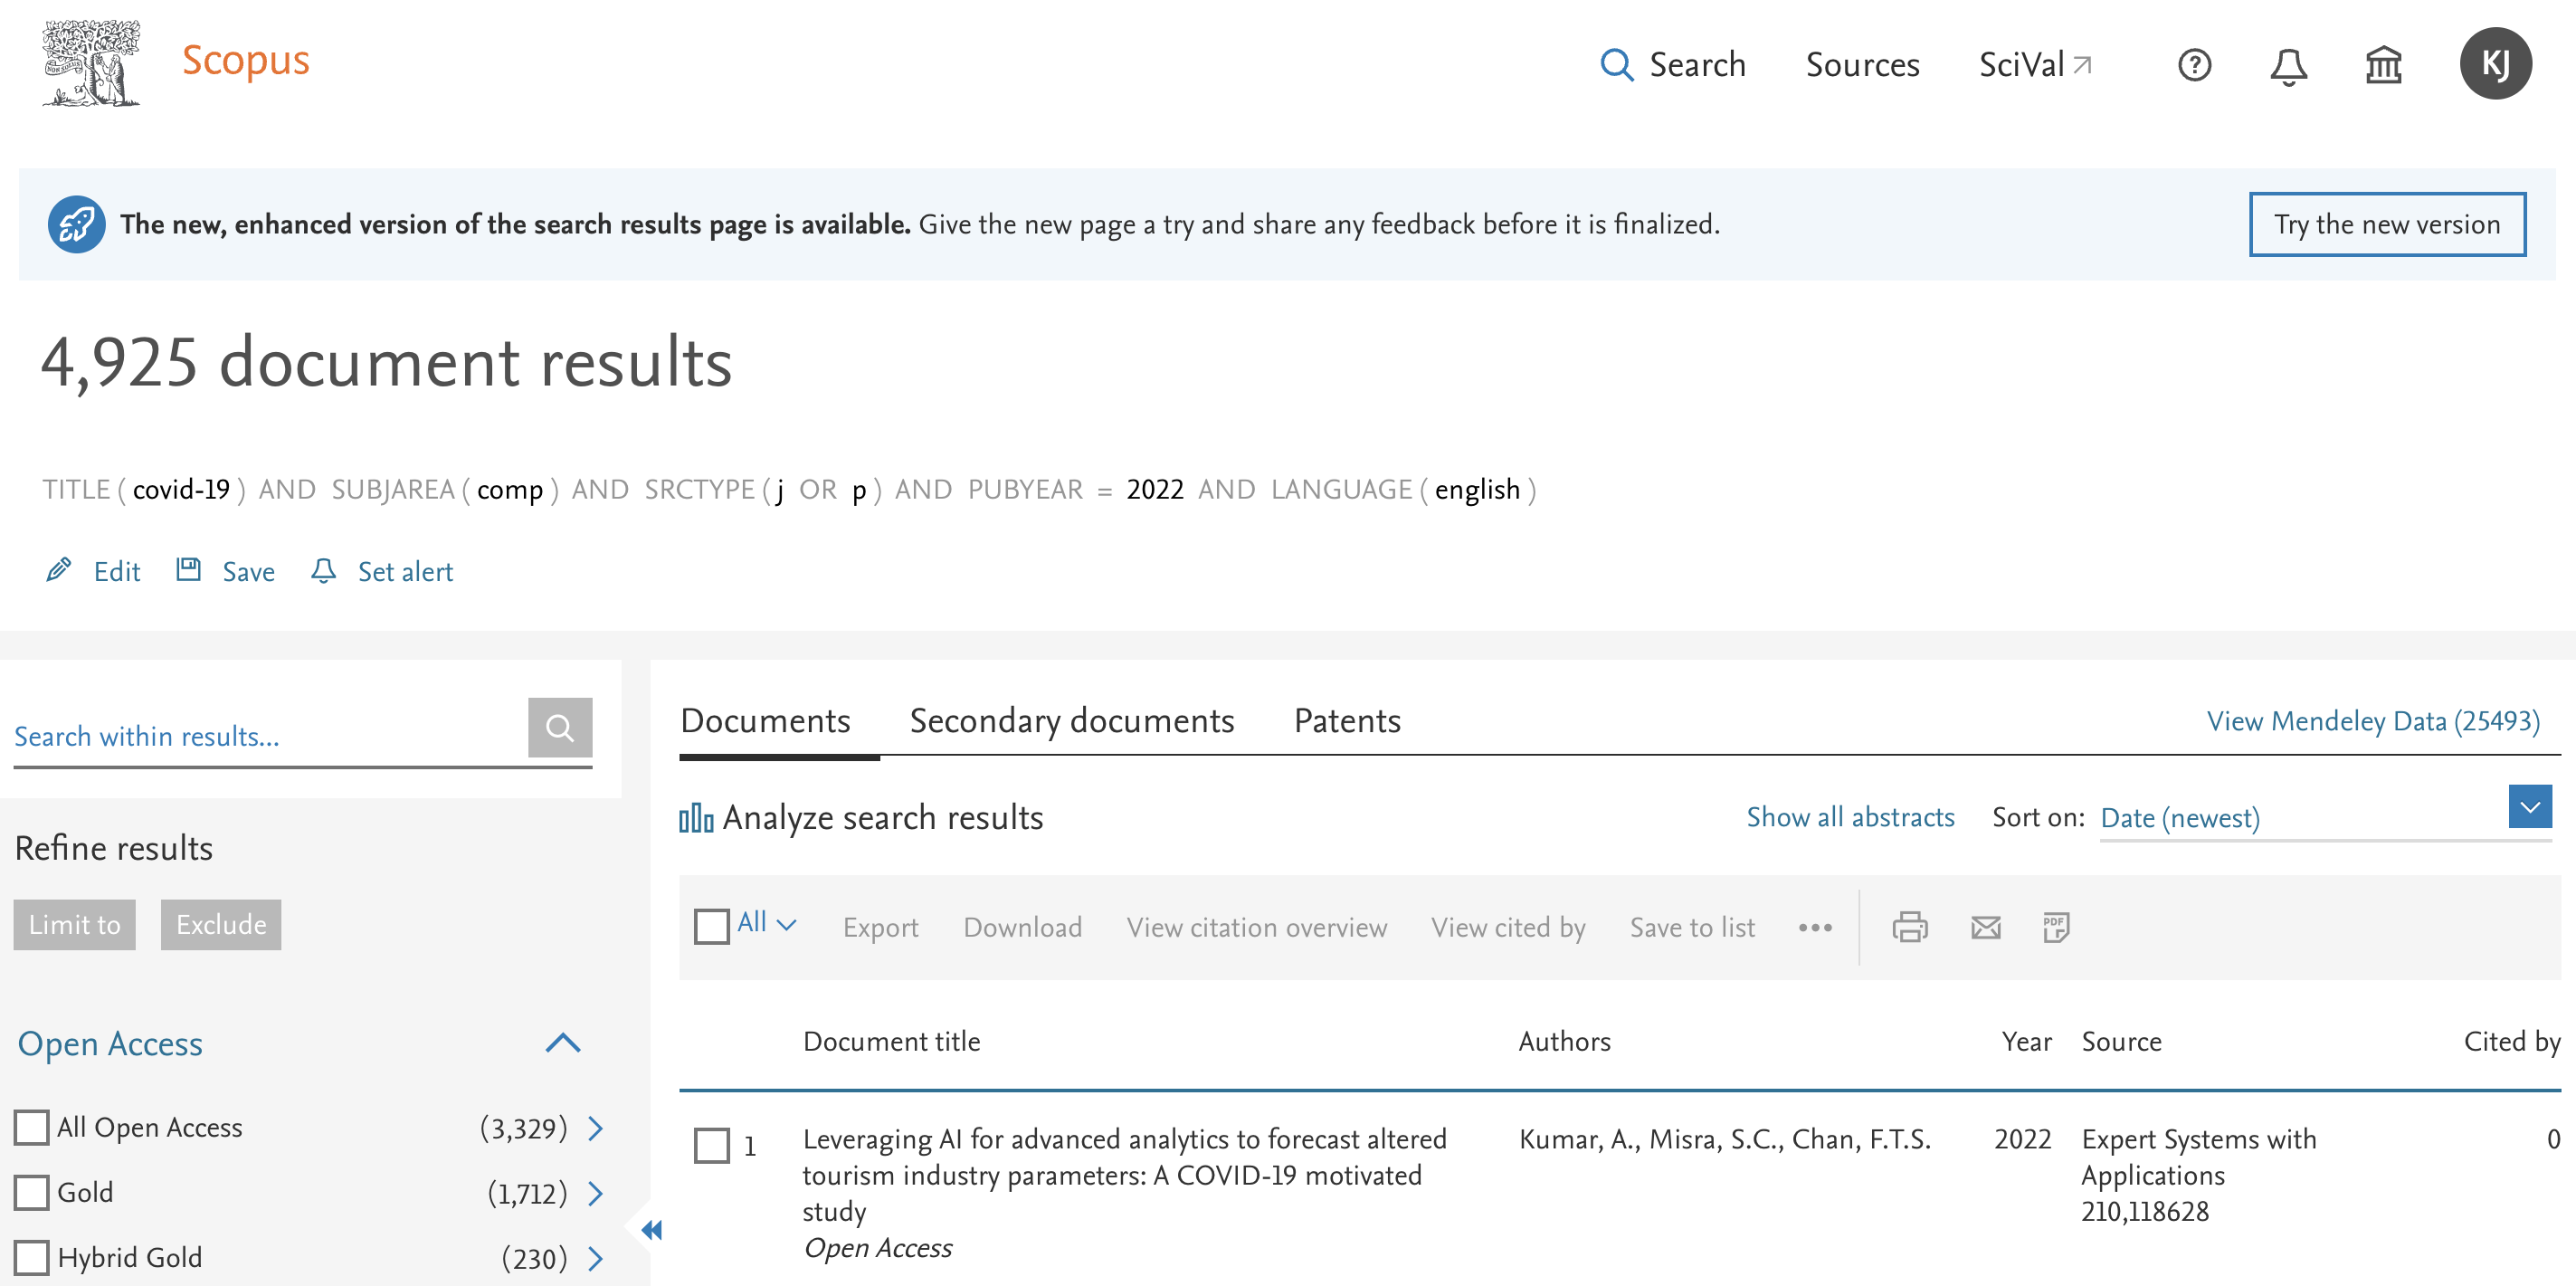

In [ ]:
# Document-specific information
from pybliometrics.scopus import AbstractRetrieval

In [ ]:
# Scopus에서 Search하는 라이브러리를 불러옵니다.
from pybliometrics.scopus import ScopusSearch

# 검색어: Scopus에서 키워드를 넣고 검색하면 발생하는 바로 그 검색식입니다.
query = ' TITLE ( covid-19 )  AND SUBJAREA ( comp )  AND SRCTYPE ( j  OR  p )  AND PUBYEAR  =  2022  AND LANGUAGE ( english ) '

"""
TITLE ( covid-19 ) : title ( covid-19 )
SUBJAREA ( comp ) : subject area ( computer science )
SRCTYPE ( j OR p ) : conent category ( journal OR conference proceed )
PUBYEAR = 2022 : publication year ( 2022 )
LANGUAGE ( english ) : language ( english )
"""

                 
# 검색 시작
s = ScopusSearch(query, 
                 download=True, # 검색 결과를 저장합니다. 
                 verbose=True,  # 진행 상황을 표시합니다.
                 subscriber=False
                 )

100%|██████████| 198/198 [02:24<00:00,  1.37it/s]


In [ ]:
s.get_results_size()

4925

## 3. Pandas로 검색결과 정리하기

In [ ]:
import pandas as pd
df_s = pd.DataFrame(s.results)
df_s.head()

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-85136502755,10.1016/j.eswa.2022.118628,S0957417422016761,None,Leveraging AI for advanced analytics to foreca...,ar,Article,Kumar A.,None,Indian Institute of Technology Kanpur,...,None,None,None,0,0,repositoryvor,Green,None,None,None
1,2-s2.0-85136456911,10.1016/j.eswa.2022.118227,S0957417422013781,None,A hybrid random forest deep learning classifie...,ar,Article,Hemalatha M.,None,Saveetha Engineering College,...,None,None,None,1,1,repositoryvor,Green,None,None,None
2,2-s2.0-85136021390,10.1016/j.eswa.2022.118505,S0957417422015883,None,Forecast daily tourist volumes during the epid...,ar,Article,Zhang C.,None,"School of Business Administration, Northeaster...",...,None,None,None,0,0,repositoryvor,Green,None,None,None
3,2-s2.0-85130320066,10.1016/j.ejor.2022.03.052,S0377221722002752,None,Designing an optimal sequence of non‐pharmaceu...,ar,Article,Biswas D.,None,ESSEC Business School,...,1372-1391,None,None,1,1,repositoryvor,Green,None,None,None
4,2-s2.0-85140806756,10.1016/j.chemolab.2022.104695,S0169743922002064,None,A robust semantic lung segmentation study for ...,ar,Article,Aslan M.F.,None,Karamanoğlu Mehmetbey Üniversitesi,...,None,None,None,0,0,repositoryvor,Green,None,None,None


In [ ]:
# 예시 확인
df_s.loc[0]

eid                                                   2-s2.0-85136502755
doi                                           10.1016/j.eswa.2022.118628
pii                                                    S0957417422016761
pubmed_id                                                           None
title                  Leveraging AI for advanced analytics to foreca...
subtype                                                               ar
subtypeDescription                                               Article
creator                                                         Kumar A.
afid                                                                None
affilname                          Indian Institute of Technology Kanpur
affiliation_city                                                  Kanpur
affiliation_country                                                India
author_count                                                        None
author_names                                       

In [ ]:
# 종류 확인 (1) : subtype Description
df_s["subtypeDescription"].unique()

array(['Article', 'Review', 'Data Paper', 'Note', 'Erratum', 'Editorial',
       'Short Survey', 'Conference Paper', 'Letter', 'Conference Review'],
      dtype=object)

In [ ]:
# 종류 확인 (2) : Country
df_s["affiliation_country"].unique()

array(['India', 'China', 'France', 'Turkey', 'North Macedonia', 'Italy',
       'United Kingdom', 'Peru', 'Qatar', 'Morocco', 'Malaysia',
       'Indonesia', 'United States', 'Iran', 'United States;India',
       'United Kingdom;United Kingdom', 'Canada', 'Saudi Arabia',
       'Brazil', 'Iraq', 'Germany', 'Pakistan', 'Australia', 'Singapore',
       'Germany;United States;United States', 'China;China;China',
       'Rwanda', 'Lebanon;Lebanon', 'Bangladesh', 'Norway',
       'United States;United States', 'Kuwait', 'Lebanon',
       'Singapore;Singapore', 'Hong Kong', 'Greece', 'Thailand',
       'Ireland;India', 'Canada;Canada', 'Romania', 'Spain;United States',
       'Italy;Italy', 'Mexico', 'Switzerland', 'Pakistan;China',
       'Ethiopia', 'Ghana', 'Croatia', 'China;China', 'Spain', 'Egypt',
       'Nepal', 'Oman', 'Czech Republic', 'Tunisia', 'Colombia', None,
       'Jordan', 'Algeria;Algeria', 'Sweden', 'Tanzania', 'Macao',
       'China;Canada', 'United Arab Emirates', 'Malay

In [ ]:
# "title", "citecby_count" 정보만 가져오기
df_j = df_s[['title','citedby_count']]
df_j.head()

,title,citedby_count
0,Leveraging AI for advanced analytics to foreca...,0
1,A hybrid random forest deep learning classifie...,1
2,Forecast daily tourist volumes during the epid...,0
3,Designing an optimal sequence of non‐pharmaceu...,1
4,A robust semantic lung segmentation study for ...,0


In [ ]:
df_j['citedby_count'].describe()

count    4925.000000
mean        1.368934
std         3.526177
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        71.000000
Name: citedby_count, dtype: float64

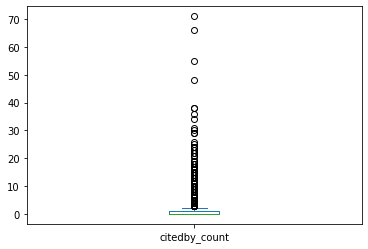

In [ ]:
df_j['citedby_count'].plot(kind='box')

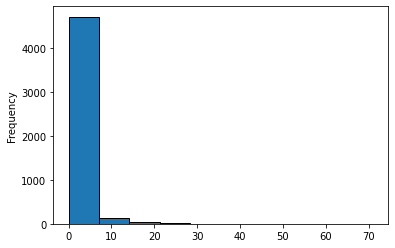

In [ ]:
df_j['citedby_count'].plot(kind='hist', ec='k')

Make Label (citated or not)
- 0: CN = 0
- 1: CN > 0

In [ ]:
import numpy as np

# Make Label
citation_class = [] # 리스트 생성

for count in df_j['citedby_count']:
  if count == 0:
    citation_class.append(0)
  else:
    citation_class.append(1)

df_j['label'] = citation_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


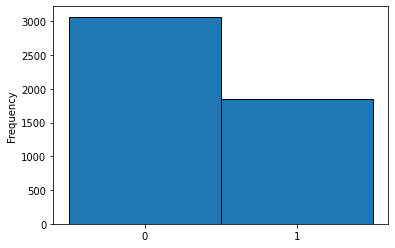

In [ ]:
df_j['label'].plot(kind='hist', bins=[-.5,.5,1.5], xticks= [0,1], ec='k')

In [ ]:
# save
#df_j.to_csv('/content/drive/MyDrive/scopus_covid.csv')

#BERT

## 1. 패키지 설치 및 불러오기

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 12.5 MB/s 
     |████████████████████████████████| 7.6 MB 59.7 MB/s 
     |████████████████████████████████| 163 kB 61.6 MB/s 


In [ ]:
import os
import torch
import torch.nn.functional as F
import random
import transformers
import urllib.request
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
from tqdm.auto import tqdm

In [ ]:
# Find out if GPU is avialiable'

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
# Set hyper-parameters
seed = 1234
modelname = 'bert-base-uncased'
num_labels = 2  # 2 for binary classification / if num_label = 1 : regression 

## 2. 데이터 가져오기

In [ ]:
#df_j = pd.read_csv('/content/drive/MyDrive/Colab/scopus_covid.csv')
df = df_j[['title', 'label']]
df.head()

,title,label
0,Leveraging AI for advanced analytics to foreca...,0
1,A hybrid random forest deep learning classifie...,1
2,Forecast daily tourist volumes during the epid...,0
3,Designing an optimal sequence of non‐pharmaceu...,1
4,A robust semantic lung segmentation study for ...,0


In [ ]:
print('전체 데이터 개수 : {}'.format(len(df)))

전체 데이터 개수 : 4925


In [ ]:
# Class 별 분포 확인 
positiveNum = len(df.loc[df['label'] == 1])
print('Total : {}\nPositive : {} \nNegative : {}'.format(len(df),positiveNum, len(df)-positiveNum))

Total : 4925
Positive : 1855 
Negative : 3070


## 3. 데이터 전처리

### 3.1. 정제 (Cleaning)

In [ ]:
df['title'][0]

'Leveraging AI for advanced analytics to forecast altered tourism industry parameters: A COVID-19 motivated study'

In [ ]:
def preprocess(sen) :
  # Remove special characters
  sentence = re.sub(r'[^a-zA-Z]', ' ', sen)

  return sentence

In [ ]:
example = preprocess(df["title"][0])
example

'Leveraging AI for advanced analytics to forecast altered tourism industry parameters  A COVID    motivated study'

In [ ]:
titles = []
sentences = list(df['title'])

for sen in sentences :
  titles.append(preprocess(sen))

In [ ]:
titles[0]

'Leveraging AI for advanced analytics to forecast altered tourism industry parameters  A COVID    motivated study'

In [ ]:
labels = list(df["label"])

### 3.2. 토큰화 (Tokenization)
토큰화란 주어진 문장을 토큰이라는 단위로 나누는 작업을 의미

BERT 모델의 input

*   label
*   input_ids : 토큰화를 통해 토큰이라는 단위로 나뉜 텍스트를 숫자로 변경
*   token_type_ids 
    * 쌍으로 이루어진 시퀀스(ex. 질문 - 답변)에 대하여 첫번째 시퀀스와 두번째 시퀀스를 0과 1로 구분
    * 분류 문제에서는 문장 쌍을 구분할 필요가 없기 때문에 모두 하나의 시퀀스로 생각하여 0으로 처리
*   attention_mask : padding 여부

따라서 **input_ids, token_type_ids, attention_mask를 생성**해야함.

input을 생성하기 위한 과정은 다음과 같다.


1.   토큰화
2.   Special Token 추가 

  *   [CLS] : 문장의 시작
  *   [SEP] : 문장의 끝

3. 정수인코딩

4. Truncation / Padding 
   
  *   BERT의 경우 input의 최대 길이를 512개의 토큰으로 제한하며 모든 input 문장의 길이가 동일해야함
  *   input의 길이가 512보다 긴 경우, truncation을 수행하고 짧은 경우는 padding을 수행

In [ ]:
tokenizer = BertTokenizer.from_pretrained(modelname, do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# example of tokenization
example = tokenizer(titles[2])
example

{'input_ids': [101, 19939, 3679, 7538, 6702, 2076, 1996, 16311, 2558, 2478, 2522, 17258, 2951, 3945, 3194, 2951, 1998, 4633, 2951, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(example["input_ids"])

['[CLS]',
 'forecast',
 'daily',
 'tourist',
 'volumes',
 'during',
 'the',
 'epidemic',
 'period',
 'using',
 'co',
 '##vid',
 'data',
 'search',
 'engine',
 'data',
 'and',
 'weather',
 'data',
 '[SEP]']

In [ ]:
max_len = 0

# For every sentence...
for title in titles:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(title, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  68


In [ ]:
input_ids = []
attention_masks = []

for title in titles :
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    
    encoded_dict = tokenizer.encode_plus(
        title, 
        add_special_tokens = True,
        max_length = 128,
        truncation = True,
        padding = 'max_length',
        return_attention_mask = True,
        return_token_type_ids = False,
        return_tensors = 'pt',  # Return pytorch tensors.
    )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

In [ ]:
print('Original sentence : ' ,titles[2]) 
print('input_ids : ' ,input_ids[2]) 
print('attention_mask : ' ,attention_masks[2]) 

Original sentence :  Forecast daily tourist volumes during the epidemic period using COVID    data  search engine data and weather data
input_ids :  tensor([[  101, 19939,  3679,  7538,  6702,  2076,  1996, 16311,  2558,  2478,
          2522, 17258,  2951,  3945,  3194,  2951,  1998,  4633,  2951,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,    

In [ ]:
# Tensor list to tensor 
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

print(input_ids.shape, attention_masks.shape)

torch.Size([4925, 128]) torch.Size([4925, 128])


In [ ]:
labels = torch.tensor(labels)
print(labels.shape)

torch.Size([4925])


### 3.3. 데이터 분할 (Train, Validation, Test set)

In [ ]:
dataset = TensorDataset(input_ids, attention_masks, labels)

In [ ]:
# Train : Validation : Test = 0.6 : 0.2 :0.2
train_size = int(0.6 * len(dataset))
val_size = int(0.2*len(dataset))
test_size = len(dataset) - train_size - val_size

In [ ]:
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size],  generator=torch.Generator().manual_seed(seed))

In [ ]:
train_positive = sum(train_dataset[:][2])
val_positive = sum(val_dataset[:][2])
test_positive = sum(test_dataset[:][2])

train_negative = len(train_dataset) - train_positive
val_negative = len(val_dataset) - val_positive
test_negative = len(test_dataset) - test_positive

print("=========== Train ===========")
print('Total : {}\nPositive : {} \nNegative : {}'.format(len(train_dataset), train_positive, train_negative))
print("=========== Valid===========")
print('Total : {}\nPositive : {} \nNegative : {}'.format(len(val_dataset), val_positive, val_negative))
print("=========== Test ===========")
print('Total : {}\nPositive : {} \nNegative : {}'.format(len(test_dataset), test_positive, test_negative))

=========== Train ===========
Total : 2955
Positive : 1089 
Negative : 1866
=========== Valid===========
Total : 985
Positive : 388 
Negative : 597
=========== Test ===========
Total : 985
Positive : 378 
Negative : 607


In [ ]:
batch_size = 16
 
train_dataloader = DataLoader(
    train_dataset,
    sampler = RandomSampler(train_dataset, generator=torch.Generator().manual_seed(42)),
    batch_size = batch_size,
)

val_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size,
        )

test_dataloader = DataLoader(
            test_dataset,
            sampler = SequentialSampler(test_dataset), 
            batch_size = batch_size,
        )

## 4. 모델 학습 (Traininng)

### 4.1. Fine-tuning BERT for text classification


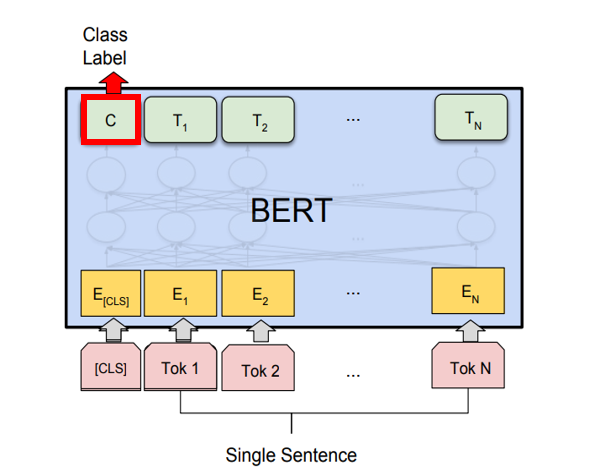


*   Text classification의 경우, BERT의 마지막 layer에 한 개의 dense layer를 추가하여 classification을 수행함
*   transformers 라이브러리의 BertForSeqeunceClassification을 이용하여 text classification을 위한 fine-tuning 수행 가능




4.1. Import Pre-trained BERT

In [ ]:
# Loading model 
model = BertForSequenceClassification.from_pretrained(
    modelname, 
    num_labels = num_labels, 
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU
model.to(device)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

### 4.2. Set optimizer and scheduler



*   AdamW optimizer : https://hiddenbeginner.github.io/deeplearning/paperreview/2019/12/29/paper_review_AdamW.html
*   Linear Warm-up Scheduler 
    
    : Warm-up Proportion * Total training step 만큼 learnign rate를 선형적으로 증가시킨 후 learning rate가 1을 도달하면 감소시키는 방법

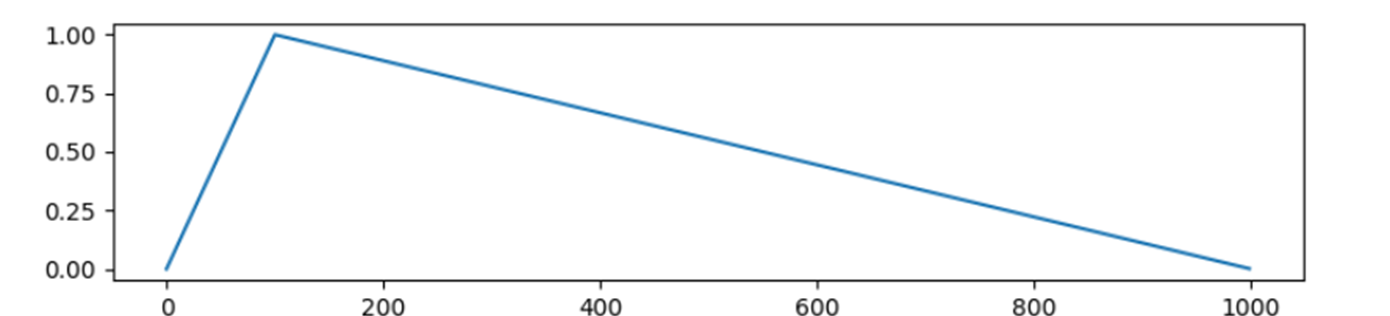


In [ ]:
optimizer = torch.optim.AdamW(model.parameters(),
                  lr = 2e-5,
                  eps = 1e-8
                 )

In [ ]:
epochs = 5

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = total_steps * 0.1,
                                            num_training_steps = total_steps)

### 4.3. Training

In [ ]:
def flat_accuracy(preds, labels) :
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
seed_val = seed
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

for epoch in range(epochs) :
    # ========================================
    #               Training
    # ========================================
    total_train_loss = 0
    n_entries = 0
    model.train()

    train_desc = "Epoch {:2d}: Train - Loss: {:.6f}"
    train_bar = tqdm(initial=0, leave=True, total=len(train_dataloader),
                    desc=train_desc.format(epoch+1, 0), position=0)
    
    for batch in train_dataloader :

        b_input_ids = batch[0].to(device)
        b_attention_masks = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()

        outputs = model(b_input_ids,
                        token_type_ids = None,
                        attention_mask = b_attention_masks,
                        labels = b_labels)
        
        loss = outputs[0]
        logits = outputs[1]

        total_train_loss += loss.item()
        n_entries += 1

        loss.backward()

        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

        # update parameters
        optimizer.step()

        scheduler.step()

        train_bar.desc = train_desc.format(epoch+1, total_train_loss / n_entries)
        train_bar.update(1)

    train_bar.close()
    avg_train_loss = total_train_loss / len(train_dataloader)

    # ========================================
    #               Validation
    # ========================================
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    n_entries = 0

    eval_desc = "Epoch {:2d}: Valid - Loss: {:.6f}"
    eval_bar = tqdm(initial=0, leave=True, total=len(val_dataloader),
                    desc=eval_desc.format(epoch+1, 0), position=0)
    
    for batch in val_dataloader :

        b_input_ids = batch[0].to(device)
        b_attention_masks = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad() :
            outputs = model(b_input_ids,
                            token_type_ids = None,
                            attention_mask = b_attention_masks,
                            labels = b_labels)
            
        loss = outputs[0]
        logits = outputs[1]

        total_eval_loss += loss.item()
        n_entries += 1

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

        eval_bar.desc = eval_desc.format(epoch+1, total_eval_loss / n_entries)
        eval_bar.update(1)

    eval_bar.close()

    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    avg_val_loss = total_eval_loss / len(val_dataloader)

    tqdm.write('Epoch {:2d}: \tTrain Loss {:.2f} ' \
               '\tValid Loss {:.2f} \tValid Accuracy {:.2f}\t'
               .format(epoch+1, avg_train_loss, avg_val_loss, avg_val_accuracy))

Epoch  1: Train - Loss: 0.000000:   0%|          | 0/185 [00:00<?, ?it/s]

Epoch  1: Valid - Loss: 0.000000:   0%|          | 0/62 [00:00<?, ?it/s]

Epoch  1: 	Train Loss 0.59 	Valid Loss 0.72 	Valid Accuracy 0.57	


Epoch  2: Train - Loss: 0.000000:   0%|          | 0/185 [00:00<?, ?it/s]

Epoch  2: Valid - Loss: 0.000000:   0%|          | 0/62 [00:00<?, ?it/s]

Epoch  2: 	Train Loss 0.54 	Valid Loss 0.78 	Valid Accuracy 0.60	


Epoch  3: Train - Loss: 0.000000:   0%|          | 0/185 [00:00<?, ?it/s]

Epoch  3: Valid - Loss: 0.000000:   0%|          | 0/62 [00:00<?, ?it/s]

Epoch  3: 	Train Loss 0.47 	Valid Loss 0.90 	Valid Accuracy 0.58	


Epoch  4: Train - Loss: 0.000000:   0%|          | 0/185 [00:00<?, ?it/s]

Epoch  4: Valid - Loss: 0.000000:   0%|          | 0/62 [00:00<?, ?it/s]

Epoch  4: 	Train Loss 0.39 	Valid Loss 0.99 	Valid Accuracy 0.58	


Epoch  5: Train - Loss: 0.000000:   0%|          | 0/185 [00:00<?, ?it/s]

## 5. 모델 평가 (Test)

In [ ]:
model.eval()

predictions, true_labels = [], []

for batch in test_dataloader :
    
    b_input_ids = batch[0].to(device)
    b_attention_masks = batch[1].to(device)
    b_labels = batch[2].to(device)
        
    with torch.no_grad() :
        outputs = model(b_input_ids,
                        token_type_ids = None,
                        attention_mask = b_attention_masks,
                        labels = b_labels)
        
    loss = outputs[0]
    logits = outputs[1]

        
    #logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids) 

predictions = torch.cat(predictions, dim=0)

true_labels = np.concatenate(true_labels, axis=0).flatten()
probs = F.softmax(predictions, dim=1).to('cpu').numpy()

In [ ]:
def eval_metrics(probs, true_labels) :
    
    prediction = np.argmax(probs, axis=1).flatten()
    
    accuracy = accuracy_score(true_labels, prediction)
    precision = precision_score(true_labels, prediction)
    recall = recall_score(true_labels, prediction)
    f1 = f1_score(true_labels, prediction)

    print(confusion_matrix(true_labels,prediction))
    print('')
    print("Test Accuracy: {:.2f} \nPrecision : {:.2f}"
          "\nRecall : {:.2f} \nF1 Score : {:.2f}"
          .format(accuracy, precision, recall, f1))

In [ ]:
def evaluate_roc(probs, true_labels):

    probs = probs[:, 1]
    
    fpr, tpr, threshold = roc_curve(true_labels, probs)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
          
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

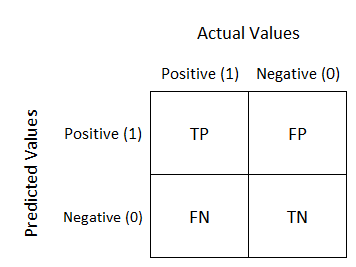

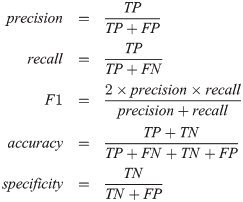

In [ ]:
eval_metrics(probs, true_labels)

[[580  27]
 [343  35]]

Test Accuracy: 0.62 
Precision : 0.56
Recall : 0.09 
F1 Score : 0.16


AUC: 0.5804


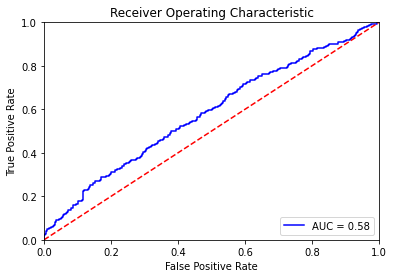

In [ ]:
evaluate_roc(probs, true_labels)